In [1]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import seaborn as sns

/tmp/ipykernel_209066/3571539897.py:4: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
df = pd.read_csv('ComputerHardware.csv')

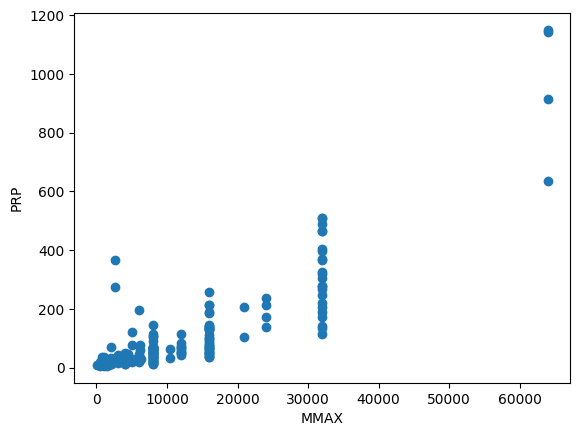

In [31]:
import matplotlib.pyplot as plt

plt.scatter(df['MMAX'],df['PRP'])
plt.xlabel('MMAX')
plt.ylabel('PRP')
plt.show()

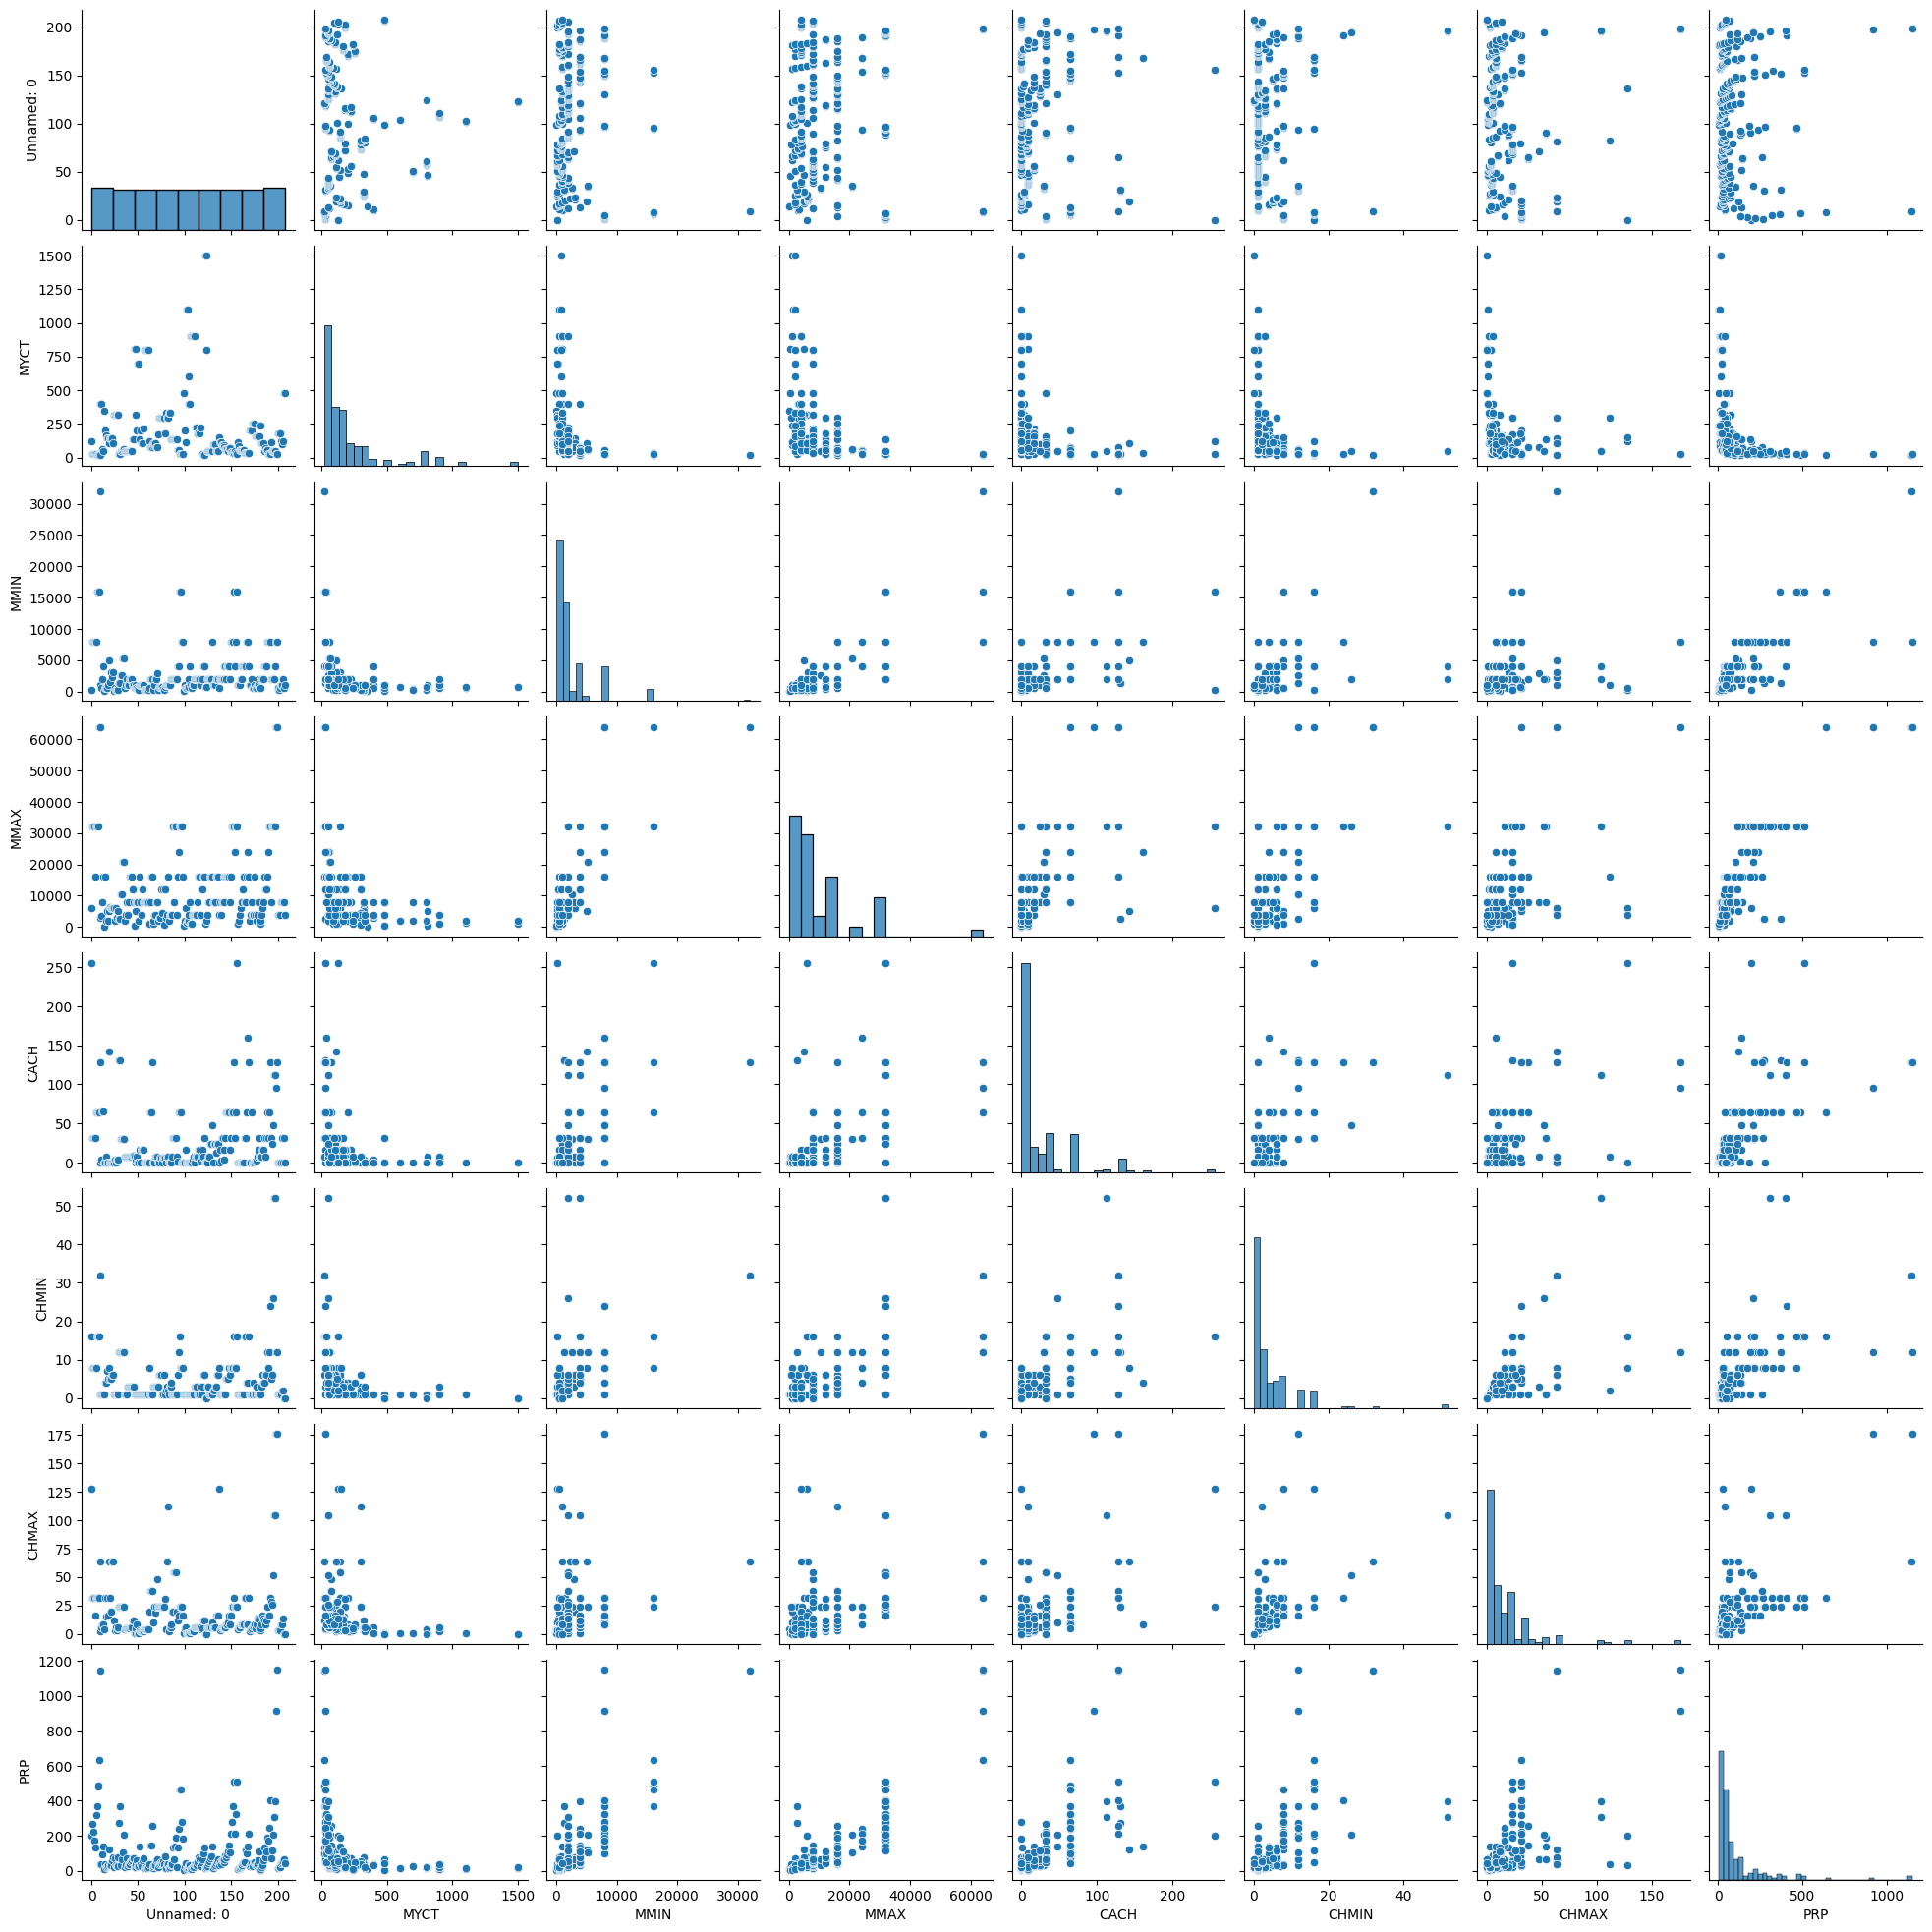

In [33]:
sns.pairplot(df)
plt.show()

In [3]:
df.head()

,Unnamed: 0,VendorName,ModelName,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX,PRP
0,0,adviser,32/60,125,256,6000,256,16,128,198
1,1,amdahl,470v/7,29,8000,32000,32,8,32,269
2,2,amdahl,470v/7a,29,8000,32000,32,8,32,220
3,3,amdahl,470v/7b,29,8000,32000,32,8,32,172
4,4,amdahl,470v/7c,29,8000,16000,32,8,16,132


In [4]:
df.isna().sum()

Unnamed: 0    0
VendorName    0
ModelName     0
MYCT          0
MMIN          0
MMAX          0
CACH          0
CHMIN         0
CHMAX         0
PRP           0
dtype: int64

In [9]:
X = df[['MMAX']]
y = df[['PRP']]
X_train,X_test,y_train,y_test =  train_test_split(X,y,test_size=0.2)

In [10]:
lr = LinearRegression()
m_lr = lr.fit(X_train,y_train)

In [11]:
m_lr

LinearRegression()

In [13]:
print(m_lr.intercept_)

[-36.59903657]


In [16]:
print(m_lr.coef_)

[[0.01226289]]


In [18]:
y_pred = m_lr.predict(X_test)

In [21]:
y_test

,PRP
88,134
175,50
150,214
141,60
49,62
132,26
197,397
200,12
75,50
198,915


In [24]:
prp = pd.DataFrame({'Actual PRP':y_test.values.flatten(),'Predicted PRP':y_pred.flatten()})
prp

,Actual PRP,Predicted PRP
0,134,355.813596
1,50,159.607280
2,214,159.607280
3,60,61.504122
4,62,61.504122
5,26,61.504122
6,397,355.813596
7,12,12.452543
8,50,110.555701
9,915,748.226229


In [27]:
from sklearn import metrics

print("Mean Squared Error: ",metrics.mean_squared_error(y_test,y_pred))
print("Mean Absolute Error: ",metrics.mean_absolute_error(y_test,y_pred))
print("Root Mean Squared Error: ",np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

Mean Squared Error:  9022.859711996845
Mean Absolute Error:  64.56442451235324
Root Mean Squared Error:  94.98873465836276


## Multiple Regression

In [40]:
df2 = df.copy()
df2

,Unnamed: 0,VendorName,ModelName,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX,PRP
0,0,adviser,32/60,125,256,6000,256,16,128,198
1,1,amdahl,470v/7,29,8000,32000,32,8,32,269
2,2,amdahl,470v/7a,29,8000,32000,32,8,32,220
3,3,amdahl,470v/7b,29,8000,32000,32,8,32,172
4,4,amdahl,470v/7c,29,8000,16000,32,8,16,132
...,...,...,...,...,...,...,...,...,...,...
204,204,sperry,80/8,124,1000,8000,0,1,8,42
205,205,sperry,90/80-model-3,98,1000,8000,32,2,8,46
206,206,sratus,32,125,2000,8000,0,2,14,52
207,207,wang,vs-100,480,512,8000,32,0,0,67


In [43]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df2['VendorName'] = label_encoder.fit_transform(df2['VendorName'])
df2['ModelName'] = label_encoder.fit_transform(df2['ModelName'])


In [44]:
X = df2.drop(columns=['PRP'])
y = df2[['PRP']]

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)


In [46]:
lr = LinearRegression()
model_mr = lr.fit(X_train,y_train)
model_mr

LinearRegression()

In [47]:
y_pred = model_mr.predict(X_test)

In [48]:
prp = pd.DataFrame({'Actual PRP':y_test.values.flatten(),'Predicted PRP':y_pred.flatten()})
prp

,Actual PRP,Predicted PRP
0,22,14.506350
1,18,34.371931
2,21,-10.212322
3,132,192.350173
4,40,94.698114
5,25,-13.551541
6,40,19.976942
7,56,42.897108
8,1144,883.540586
9,35,90.204709


In [49]:
print("Mean Absolute Error: ",metrics.mean_absolute_error(y_test,y_pred))
print("Mean Squared Error: ",metrics.mean_squared_error(y_test,y_pred))
print("Root Mean Squared Error: ",np.sqrt(metrics.mean_absolute_error(y_test,y_pred)))

Mean Absolute Error:  56.74377334009497
Mean Squared Error:  11352.300493597117
Root Mean Squared Error:  7.532846297389518
